In [3]:
#Packages
%pylab
%matplotlib inline
import numpy as np
from scipy import stats
import scipy.ndimage
import matplotlib.pyplot as plt
from images_segmentation import otsu as ot

Using matplotlib backend: QtAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
# loading some images
img_1 = imread(r"data\Otsu_data\NIH3T3\img\dna-44.png") 
img_2 = imread(r"data\Otsu_data\N2DH-GOWT1\img\t39.tif")
img_3 = imread(r"data\Otsu_data\N2DL-HeLa\img\t13.tif") 

In [5]:
def crop(image, xmin, ymin, xmax, ymax):
    cropped=np.empty([xmax-xmin, ymax-ymin], dtype=float)
    for a,b in np.ndindex(xmax-xmin, ymax-ymin):
        cropped[a,b]=image[a+xmin,b+ymin]
    return cropped

In [6]:
# otsu thresholding


from cmath import nan


def otsu_t(img,x):
    import matplotlib.pyplot
    import numpy

   

   
    # load histogram, Mathematische werte aus Histogramm rausgreifen
    n, bins = numpy.histogram(img.flatten(),bins = x)
    
    # initialize threshold value (T = 0) 
    thres = 0
    copy = img.copy()

    # create list to store values of within class variance for each threshold value
    wcv = list()

    
        
    # set up initial values
    for i in range(0,len(n)):
        wclv = 0
        w0_sum = 0
        mean_sum0 = 0
        v0_sum = 0
        mean_sum1 = 0
        v1_sum = 0
        w0 = 0
        w1 = 0
        w1_sum = 0

        #sum up the probabilites of each intensity value;  and the mean value (sind noch nicht happy mit der definition :()
        w0_sum = numpy.sum(numpy.array(n[0:i+1]))
        mean_sum0 = numpy.sum((numpy.array(bins[0:i+1])*numpy.array(n[0:i+1])))
                    
        # background class probabilites and class mean levels
        w0 = w0_sum / sum(n)  
        if(sum(n[0:i+1]) != 0):  
            mean_0 = mean_sum0 / sum(n[0:i+1])
        else: mean_0 = 0
                
        # compute background class variance

        v0_sum = numpy.sum((numpy.array((bins[0:i+1]-mean_0)** 2)*numpy.array(n[0:i+1])))
        v0 = v0_sum / sum(n[0:i+1])
                
        # sum up the probabilites of each intensity value;  and the mean value
        w1_sum = numpy.sum(numpy.array(n[i+1:len(n)]))
        mean_sum1 = numpy.sum((numpy.array(bins[i+1:len(n)])*numpy.array(n[i+1:len(n)])))
                    
        # compute foreground class probabilities and class mean levels    
        w1 = w1_sum / sum(n)
        if(sum(n[i+1:len(n)]) != 0):
            mean_1 = mean_sum1 / sum(n[i+1:len(n)])
        else: mean_1 = 0

        # compute foreground class variance 
        v1_sum = numpy.sum((numpy.array((bins[i+1:len(n)]-mean_1)** 2)*numpy.array(n[i+1:len(n)])))
            
        if( sum(n[i+1:len(n)]) != 0):
            v1 = v1_sum / sum(n[i+1:len(n)])
        else: v1 = 0

        # compute within class variance and append to list
        wclv = (w0 * v0) + (w1 * v1)
        wcv.append(wclv)

    # select optimal threshold value, minimum value of within class variance
    optimal_thres = min(wcv)

    #select optimal threshold in the list
    l = 0
    while l < len(wcv):
        if wcv[l] == optimal_thres: thres = bins[l]
        l += 1
    
        
    return thres

In [7]:
def pre_otsu(img,x):
    #counting NaNs cause I like dat
    #count=0
    #for i in np.ndindex(img.shape[0], img.shape[1]):
        #if np.isnan(img[i]):
            #count += 1
    #print(count)
    #if count>0:
    if numpy.isnan(numpy.sum(img)):
        img1 = img[:, ~np.isnan(img).all(axis=0)]
        img2 = img1[~np.isnan(img).all(axis=1), :]
        thres = otsu_t(img2,x)
         
    else: 
        thres = otsu_t(img,x)
        
    return thres


      

In [8]:
def t_sw(image,stepsize,framesize):

    img=np.empty([image.shape[0]+framesize,image.shape[1]+framesize,])
    img[:]=np.NaN
    #img=copy(image)
    for i,j in np.ndindex(image.shape[0], image.shape[1]):
        img[i,j]=image[i,j]

    intensity=np.max(img)
    array=np.zeros([img.shape[0],img.shape[1],3])
    x=0
    y=0
    while x+framesize<=img.shape[0]:    
        while y+framesize<=img.shape[1]:
            window=crop(img,x,y,x+framesize, y+framesize)
            window_1 = window[~(numpy.isnan(window))]
            threshold = pre_otsu(window,255)
            for a, b in np.ndindex(window.shape[0], window.shape[1]):
                c=a+x
                d=b+y
                array[c,d,0]+=threshold
                array[c,d,1]+=1
            y+=stepsize
        y=0
        print('row done')
        x+=stepsize 
    img=crop(img,0,0,image.shape[0],image.shape[1])
    for i, j in np.ndindex(img.shape[0], img.shape[1]):
        array[i,j,2]=array[i,j,0]/array[i,j,1]
        if img[i,j]>array[i,j,2]:
            img[i,j]=1
        else:
            img[i,j]=0
    print(img)
    figure()
    imshow(img,'gray')
    return img

[[[0.78039217 0.7490196  0.7411765 ]
  [0.78039217 0.7490196  0.7411765 ]
  [0.78039217 0.7490196  0.7411765 ]
  ...
  [0.76862746 0.7176471  0.68235296]
  [0.76862746 0.7176471  0.68235296]
  [0.76862746 0.7176471  0.68235296]]

 [[0.78039217 0.7490196  0.7411765 ]
  [0.78039217 0.7490196  0.7411765 ]
  [0.78039217 0.7490196  0.7411765 ]
  ...
  [0.76862746 0.7176471  0.68235296]
  [0.76862746 0.7176471  0.68235296]
  [0.76862746 0.7176471  0.68235296]]

 [[0.78039217 0.7490196  0.7411765 ]
  [0.78039217 0.7490196  0.7411765 ]
  [0.78039217 0.7490196  0.7411765 ]
  ...
  [0.76862746 0.7176471  0.68235296]
  [0.76862746 0.7176471  0.68235296]
  [0.76862746 0.7176471  0.68235296]]

 ...

 [[0.22745098 0.22352941 0.21568628]
  [0.23921569 0.23529412 0.22745098]
  [0.23137255 0.22745098 0.21960784]
  ...
  [0.38039216 0.3647059  0.32941177]
  [0.3647059  0.34901962 0.3137255 ]
  [0.34901962 0.33333334 0.29803923]]

 [[0.23137255 0.22745098 0.21960784]
  [0.24313726 0.23921569 0.23137255]


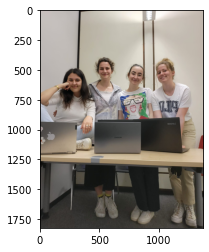

In [17]:
imagee = imread(r"data\abschlussbild.png")
imshow(image, 'gray')
print(image)

In [16]:
tee = t_sw(imagee, 50, 200)

ValueError: setting an array element with a sequence.

In [15]:
new1 = t_sw(img_1, 50,200)

row done
row done
row done


KeyboardInterrupt: 

In [ ]:
from images_segmentation import dicescore as dsc
gt1 = imread(r"data\Otsu_data\NIH3T3\gt\44.png")
dsc.dice(new1, gt1)   

0.8533422765409968

C:\Users\ievas\AppData\Local\Temp\ipykernel_7456\3771133685.py:43: RuntimeWarning: invalid value encountered in longlong_scalars
  w0 = w0_sum / sum(n)
C:\Users\ievas\AppData\Local\Temp\ipykernel_7456\3771133685.py:51: RuntimeWarning: invalid value encountered in double_scalars
  v0 = v0_sum / sum(n[0:i+1])
C:\Users\ievas\AppData\Local\Temp\ipykernel_7456\3771133685.py:58: RuntimeWarning: invalid value encountered in longlong_scalars
  w1 = w1_sum / sum(n)


row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


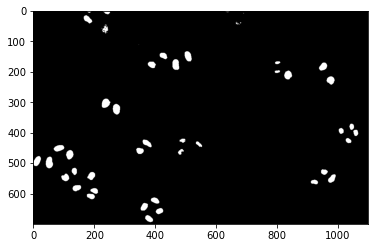

In [ ]:
new2 = t_sw(img_3, 50, 300)

In [ ]:
gt2 = imread(r"data\Otsu_data\N2DL-HeLa\gt\man_seg13.tif")
dsc.dice(new2, gt2)

0.9836612623957186

C:\Users\ievas\AppData\Local\Temp\ipykernel_7456\3771133685.py:43: RuntimeWarning: invalid value encountered in longlong_scalars
  w0 = w0_sum / sum(n)
C:\Users\ievas\AppData\Local\Temp\ipykernel_7456\3771133685.py:51: RuntimeWarning: invalid value encountered in double_scalars
  v0 = v0_sum / sum(n[0:i+1])
C:\Users\ievas\AppData\Local\Temp\ipykernel_7456\3771133685.py:58: RuntimeWarning: invalid value encountered in longlong_scalars
  w1 = w1_sum / sum(n)


row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
row done
r

0.9618356373964636

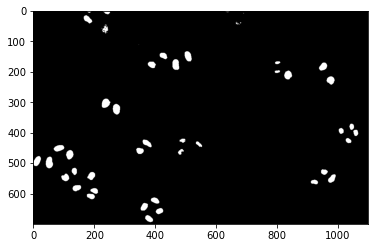

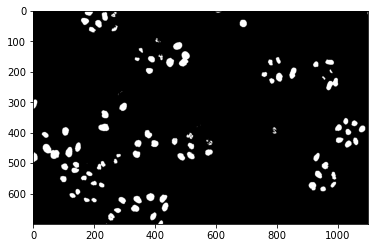

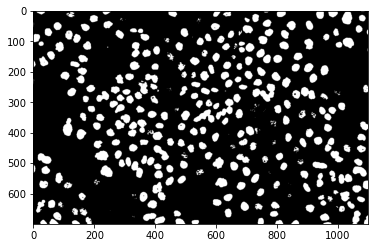

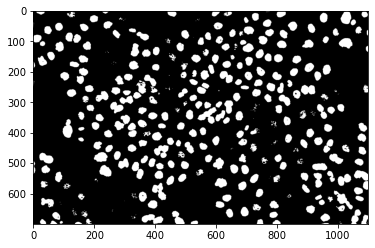

In [ ]:
img_13 = imread(r"data\Otsu_data\N2DL-HeLa\img\t13.tif") 
img_52 = imread(r"data\Otsu_data\N2DL-HeLa\img\t52.tif") 
img_75 = imread(r"data\Otsu_data\N2DL-HeLa\img\t75.tif") 
img_79 = imread(r"data\Otsu_data\N2DL-HeLa\img\t79.tif") 

gt13 = imread(r"data\Otsu_data\N2DL-HeLa\gt\man_seg13.tif")
gt52=imread(r"data\Otsu_data\N2DL-HeLa\gt\man_seg52.tif")
gt75=imread(r"data\Otsu_data\N2DL-HeLa\gt\man_seg75.tif")
gt79=imread(r"data\Otsu_data\N2DL-HeLa\gt\man_seg79.tif")

img13=t_sw(img_13, 50, 300)
img52=t_sw(img_52, 50, 300)
img75=t_sw(img_75, 50, 300)
img79=t_sw(img_79, 50, 300)

dicelist=[dsc.dice(img13, gt13), dsc.dice(img52,gt52), dsc.dice(img75,gt75), dsc.dice(img79,gt79)]


In [ ]:
print(mean(dicelist),
max(dicelist),
min(dicelist))

0.9728596882372661 0.9836612623957186 0.9618356373964636
